# Implementação de Principal Component Analysis (PCA) do professor

## Numpy

### Passo a passo

#### Variáveis

$ T:V \rightarrow V $

$ \lambda\in\R $

$ (T-\lambda\cdot{I})\times\vec{v} = \vec{0}$

$ \det(T-\lambda\cdot{I}) = 0 $

1. Achar T em $ T = [T_{V;V}] $
2. Achar $ [T-\lambda\cdot{I}] $
3. Achar auto-valores por: $ det(T-\lambda\cdot{I})=0$
4. Achar matriz de covariância $C$
5. Prova real por $T(\vec{v})=\lambda\cdot\vec{v}$
6. Diagonalização: $T=P\times D\times P^{-1}$
7. Prova real por diagonilização

### Execução do professor

1. Numpy

In [13]:
import numpy as np

2. Criação do dataset

In [14]:
dataset = np.array([(1,7.3),(2,12.8),(3,16.8),(4,22.1),(5,27.9),(6,31.4),(7,36.8),(8,43.1)])
dataset2= [(1,2,3,4,5,6,7,8), (7.3,12.8,16.8,22.1,27.9,31.4,36.8,43.1)]

In [15]:
# dataset2[1] = list(map(lambda el: el*-1, dataset2[1]))

In [16]:
np.array(dataset2)

array([[  1. ,   2. ,   3. ,   4. ,   5. ,   6. ,   7. ,   8. ],
       [ -7.3, -12.8, -16.8, -22.1, -27.9, -31.4, -36.8, -43.1]])

In [17]:
dataset.shape

(8, 2)

3. Matriz de covariância

Aparentemente o Numpy transpõe os vetores para calcular a covariância: https://numpy.org/doc/stable/reference/generated/numpy.cov.html

In [18]:
C = np.cov(dataset2)
C

array([[  6.        , -30.01428571],
       [-30.01428571, 150.51357143]])

In [19]:
np.cov(dataset2)

array([[  6.        , -30.01428571],
       [-30.01428571, 150.51357143]])

4. Auto-valores e auto-vetores

In [20]:
np.linalg.eig(C)

EigResult(eigenvalues=array([1.42114424e-02, 1.56499360e+02]), eigenvectors=array([[-0.98068778,  0.19557986],
       [-0.19557986, -0.98068778]]))

In [21]:
l1 = 1.42114424e-02 # 0.0142...
l2 = 1.56499360e+02 #156.49...

v1 = (-0.98, -0.19)
v2 = np.array((0.19,-0.98))

5. Projeção do dataset

Sendo `v2` a coluna mais significativa

In [22]:
d1_o = np.matmul(dataset,v2)
d1_o

array([ -6.964, -12.164, -15.894, -20.898, -26.392, -29.632, -34.734,
       -40.718])

## Sci-kit Learn

Tutorial: https://scikit-learn.org/dev/modules/generated/sklearn.decomposition.PCA.html

In [23]:
from sklearn.decomposition import PCA

## Criação do estimador PCA

Note que `n_components` refere-se ao número de dimensões para considerar exibir como auto-valor

In [24]:
pca = PCA(n_components=1)

In [25]:
dataset_sk_arr = np.array([(1,7.3),(2,12.8),(3,16.8),(4,22.1),(5,27.9),(6,31.4),(7,36.8),(8,43.1)])

In [26]:
import pandas as pd

In [27]:
dataset_sk = pd.DataFrame(dataset_sk_arr, columns=["C1", "C2"])
dataset_sk

,C1,C2
0,1.0,7.3
1,2.0,12.8
2,3.0,16.8
3,4.0,22.1
4,5.0,27.9
5,6.0,31.4
6,7.0,36.8
7,8.0,43.1


In [28]:
pca.fit(dataset_sk)

PCA(n_components=1)

## Matriz de covariância

In [29]:
C_sk = pca.get_covariance()
C_sk

array([[  6.        ,  30.01428571],
       [ 30.01428571, 150.51357143]])

## Auto-valores

In [30]:
pca.explained_variance_

array([156.49935999])

## Auto-vetores

Apenas do mais significativo

In [31]:
pca.set_output

<bound method _SetOutputMixin.set_output of PCA(n_components=1)>

Note a diferença nos sinais. Isso não afeta a direção!

In [32]:
v2_sk = pca.components_[0]
v2_sk

array([0.19557986, 0.98068778])

A posição relativa entre os termos é o mesmo independente do sinal!

In [33]:
d1_sk = np.matmul(dataset_sk, v2_sk)
d1_sk

0     7.354601
1    12.943963
2    17.062294
3    22.455519
4    28.339088
5    31.967075
6    37.458369
7    43.832282
dtype: float64

Em teoria com `fit_transform` diretamente dá na mesma

In [34]:
d1_sk_ft = pca.fit_transform(dataset_sk)

In [35]:
d1_sk_ft

array([[-17.82204843],
       [-12.23268579],
       [ -8.11435482],
       [ -2.72112974],
       [  3.16243924],
       [  6.79042632],
       [ 12.28172018],
       [ 18.65563305]])

# Plotagem

In [36]:
import matplotlib.pyplot as plt

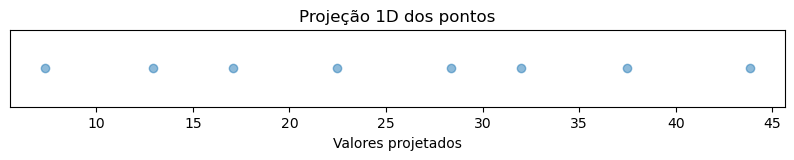

In [37]:
plt.figure(figsize=(10, 1))
plt.scatter(d1_sk, np.zeros_like(d1_sk), alpha=0.5)
plt.xlabel("Valores projetados")
plt.yticks([])
plt.title("Projeção 1D dos pontos")
plt.show()

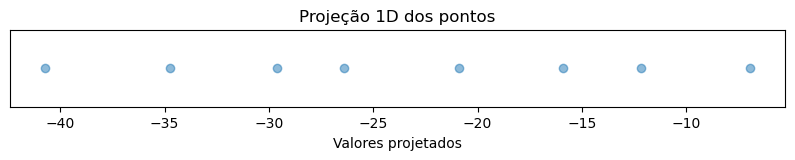

In [38]:
plt.figure(figsize=(10, 1))
plt.scatter(d1_o, np.zeros_like(d1_sk), alpha=0.5)
plt.xlabel("Valores projetados")
plt.yticks([])
plt.title("Projeção 1D dos pontos")
plt.show()

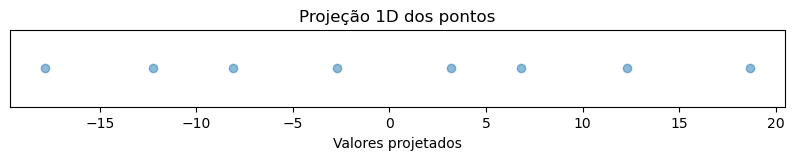

In [39]:
plt.figure(figsize=(10, 1))
plt.scatter(d1_sk_ft, np.zeros_like(d1_sk_ft), alpha=0.5)
plt.xlabel("Valores projetados")
plt.yticks([])
plt.title("Projeção 1D dos pontos")
plt.show()

OBS: Aparetam iguais mais refletidos?

In [40]:
d1_sk_flipado = np.flip(d1_sk)

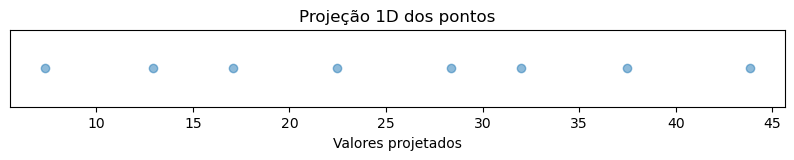

In [41]:
plt.figure(figsize=(10, 1))
plt.scatter(d1_sk_flipado, np.zeros_like(d1_sk), alpha=0.5)
plt.xlabel("Valores projetados")
plt.yticks([])
plt.title("Projeção 1D dos pontos")
plt.show()

In [42]:
d1_o[0] - d1_o[1]

5.2

## Métodos de correlação

### Correlação de elementos pelo método de Separman's Rank Correlation

In [43]:
from scipy.stats import spearmanr

correlation, _ = spearmanr(d1_o, d1_sk)
print("Spearman rank correlation:", correlation)
correlation, _ = spearmanr(d1_o, d1_sk_ft)
print("Spearman rank correlation:", correlation)

Spearman rank correlation: -1.0
Spearman rank correlation: -1.0


-1 implica ordem inversa

### Kendall's Tau

In [44]:
from scipy.stats import kendalltau

tau, _ = kendalltau(d1_o, d1_sk)
print("Kendall's Tau:", tau)
tau, _ = kendalltau(d1_o, d1_sk_ft)
print("Kendall's Tau:", tau)

Kendall's Tau: -0.9999999999999998
Kendall's Tau: -0.9999999999999998


Idem...

### Plotando:

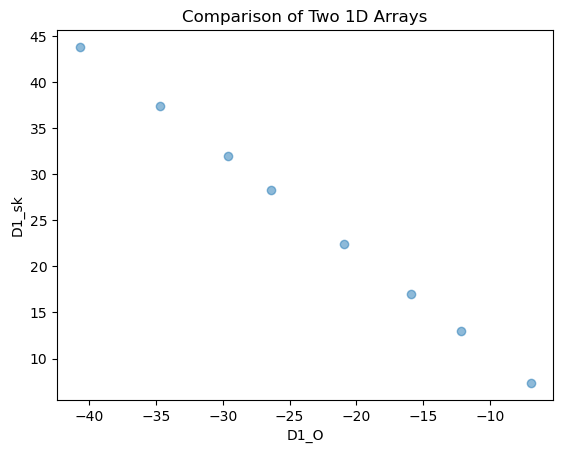

In [45]:
import matplotlib.pyplot as plt

plt.scatter(d1_o, d1_sk, alpha=0.5)
plt.xlabel("D1_O")
plt.ylabel("D1_sk")
plt.title("Comparison of Two 1D Arrays")
plt.show()

Ficam numa linha, sendo essa próxima de $y = x \therefore$ são semelhantes

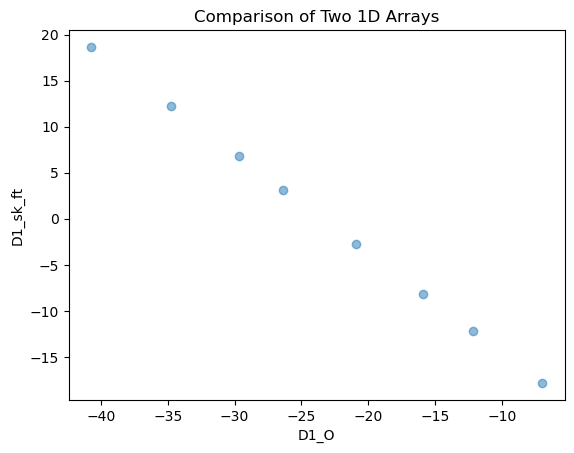

In [46]:
plt.scatter(d1_o, d1_sk_ft, alpha=0.5)
plt.xlabel("D1_O")
plt.ylabel("D1_sk_ft")
plt.title("Comparison of Two 1D Arrays")
plt.show()

### Plotando ainda mais

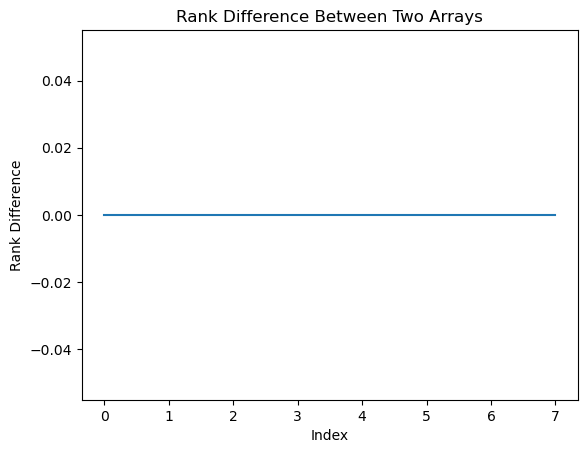

In [47]:
import numpy as np

rank1 = np.argsort(np.argsort(d1_sk_flipado))
rank2 = np.argsort(np.argsort(d1_o))

rank_difference = rank1 - rank2
plt.plot(rank_difference)
plt.xlabel("Index")
plt.ylabel("Rank Difference")
plt.title("Rank Difference Between Two Arrays")
plt.show()